In [3]:
pip install ucimlrepo

# Introduction
The goal of this project is to predict the income, which has two possible classes: individuals earning \$50,000 or less per year and individuals earning more than $50,000 per year.
To achieve this, we will utilize the Adult Census Income Dataset, a well-known dataset from the UCI Machine Learning Repository.

Our predictive model will be built using Decision Trees, a popular machine learning algorithm known for its simplicity, interpretability, and effectiveness in handling both numerical and categorical data. Decision Trees partition the dataset into subsets based on feature values, creating a tree-like structure that can be used to make predictions.

**Load and Preview the Data**

In [4]:
import warnings
warnings.filterwarnings('ignore')


#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
x = adult.data.features
y = adult.data.targets


# Dataset columns
# column_names = [
#     'age', 'workclass', 'fnlwgt', 'education', 'education_num',
#     'marital_status', 'occupation', 'relationship', 'race',
#     'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
#     'native_country', 'income'
# ]

df = pd.DataFrame(x)
df['income'] = y

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Observation
The dataset contains a total of 48,842 entries and 15 columns.

*Features:*

**Numerical Features :** Age, Final Weight, Education Number, Capital Gain, Capital Loss, Hours Per Week

**Object Features :** Workclass, Education, Martial Status, Occupation, Relationship, Race, Sec, Native Country, Income

**Key Observations: **


*   Missing Data:
    * Three columns have missing values: workclass, occupation, and native-country
*   Presence of '.' in column income :
    * We see where we printed the dataset that in the column income there are some values with '.' in the end.



In [5]:
#Replace '<=50K.' with'<=50K' and '>50K.' with '>50K'
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.' : '>50K'})

### Checking for Unusual Symbols in Dataset Columns

In [6]:
# Check for '?' and other unusual symbols
unusual_symbols = ['?', '$', '%', '@', '#', '!', '*', '/', '\\', '^', '~']

# Find columns containing these symbols and count occurrences
symbol_count = {}
for symbol in unusual_symbols:
    escaped_symbol = "\\" + symbol if symbol in ['?', '*', '^', '$', '\\', '.', '+'] else symbol
    count = df.apply(lambda col: col.astype(str).str.match(f'^{escaped_symbol}$', na=False).sum())
    total_count = count.sum()
    if total_count > 0:
        symbol_count[symbol] = total_count

# Output the unusual symbols found and their counts
if symbol_count:
    print("Unusual symbols found in the dataset:")
    for symbol, count in symbol_count.items():
        print(f"Symbol: {symbol}, Count: {count}")
else:
    print("No unusual symbols found in the dataset.")


Unusual symbols found in the dataset:
Symbol: ?, Count: 4262


After analyzing the dataset, we identified 4,262 occurrences of the symbol ? across different columns. This symbol typically represents missing or unknown values in the dataset. Since these symbols do not add meaningful information and are not needed for our analysis or model training, we have decided to replace all instances of ? with NaN (null values).

In [7]:
#Replacing '?' with null
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Among the numerical features—age, fnlwgt, education_num, capital_gain, capital_loss, and hours_per_week—there are no missing values, meaning these columns are fully populated and ready for analysis.

Missing values are in the categorical features, which should be addressed for consistency and accuracy in analysis. Specifically:

*   Workclass has 2,081 missing values, making up about 4.26% of the total data.
*   Occupation has 2,080 missing values, representing 4.26% of the dataset.
*   Native_country has 963 missing values, accounting for 1.97% of the data.

These missing values, though relatively small in proportion to the total dataset, could potentially introduce bias or inconsistencies so we handle those to achive reliable results


In [ ]:
#Deal with null values by replacing them with the mode
for col in ['workclass', 'occupation', 'native-country']: df[col].fillna(df[col].mode()[0], inplace=True)

### Checking and Visualizing the Class Distribution of Income

Class Distribution:
 income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64


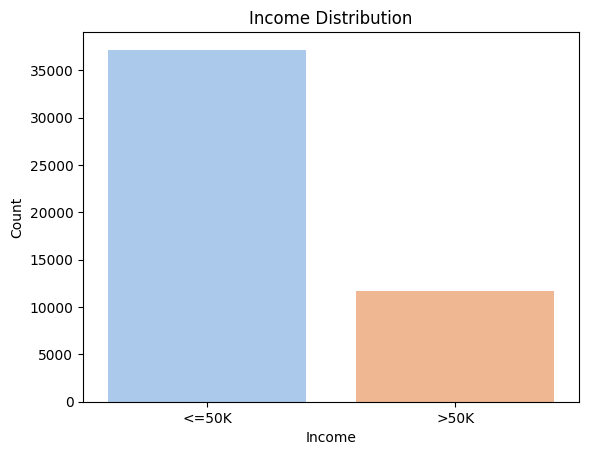

In [8]:
# Check the class distribution
class_distribution = df['income'].value_counts(normalize=True) * 100
print("Class Distribution:\n", class_distribution)

# Visualize the class distribution
sns.countplot(data=df, x='income', palette='pastel')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

**<=50K:** 76.07% of the instances in the dataset represent individuals with an income of less than or equal to $50,000 per year.

**>50K:** 23.92% of the instances represent individuals with an income of more than $50,000 per year.

This means the dataset is imbalanced, with the majority of data points belonging to the <=50K class. However, this would not have
a significant effect on the algorithm and hence would not be
classified as a problem in our study

## Data Analysis

In [ ]:

# Summary Statistics
print("Summary Statistics for Numerical Features:\n")

df.describe().T


Summary Statistics for Numerical Features:



,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


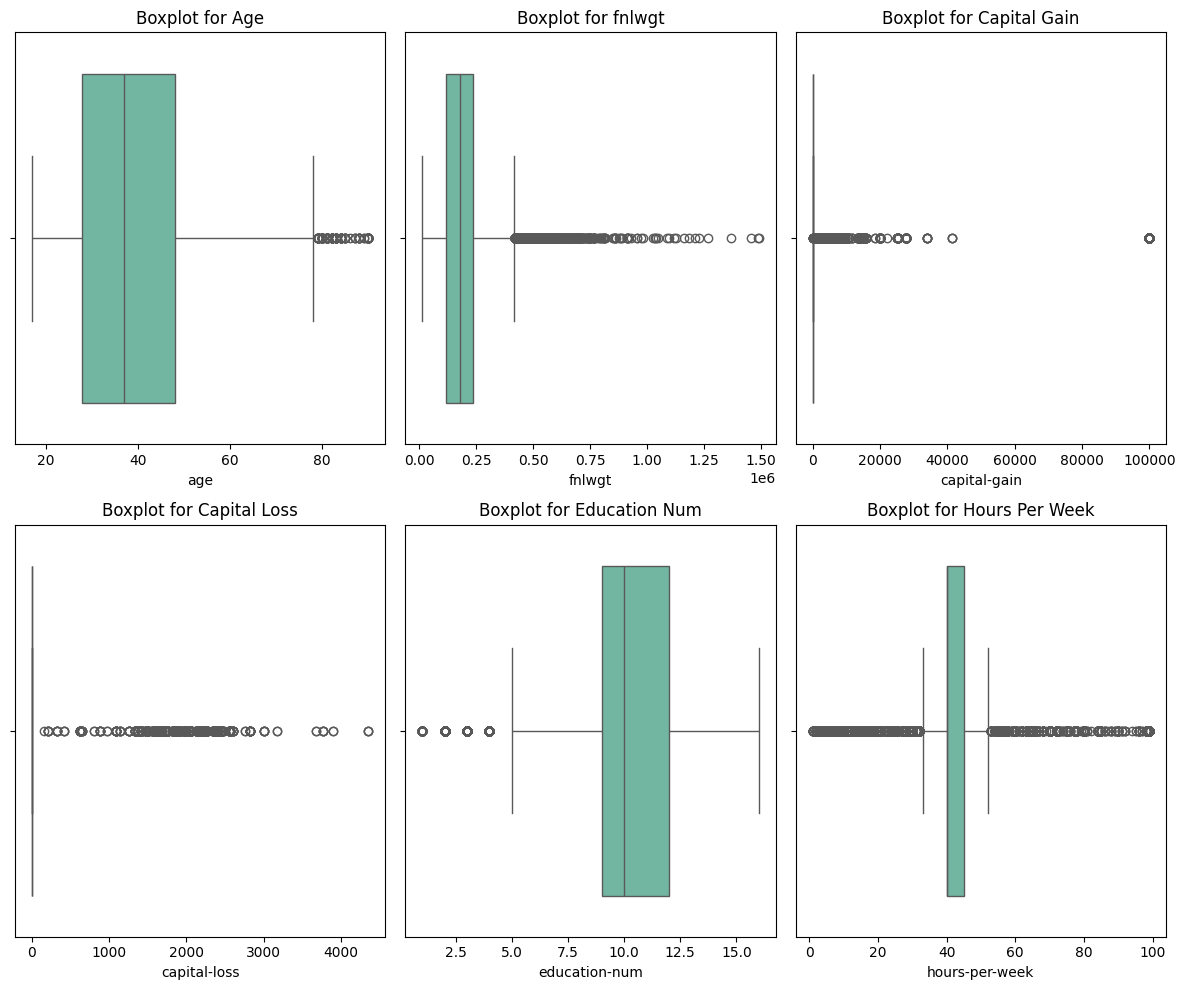

In [ ]:
# Set up the figure and axis for the plots
plt.figure(figsize=(12, 10))

# Boxplot for Age
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='age', palette='Set2')
plt.title('Boxplot for Age')

# Boxplot for fnlwgt
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='fnlwgt', palette='Set2')
plt.title('Boxplot for fnlwgt')

# Boxplot for Capital Gain
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='capital-gain', palette='Set2')
plt.title('Boxplot for Capital Gain')

# Boxplot for Capital Loss
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='capital-loss', palette='Set2')
plt.title('Boxplot for Capital Loss')

# Boxplot for Education Num
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='education-num', palette='Set2')
plt.title('Boxplot for Education Num')

# Boxplot for Hours Per Week
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='hours-per-week', palette='Set2')
plt.title('Boxplot for Hours Per Week')

# Adjust layout
plt.tight_layout()
plt.show()

The boxplots for the features age, fnlwgt, capital_gain, capital_loss, education_num, and hours_per_week provide a visual summary of the distribution of these numerical variables. They help us identify outliers that could affect tree splitting decisions, understand the distribution and spread of features, detect potential data quality issues that might need preprocessing.

1.    Age:
  *   Most people in the dataset are between roughly 25-50 years old
  *   This suggests that decision tree splits based on age are likely to be most informative within this range.
2.   Fnlwgt (Final Weight):
  *   Shows a very compact box with many outliers
  *   The presence of extreme outliers suggests this feature might need scaling or transformation before use in the decision tree
3. Capital Gain:
  *   Most values are concentrated near zero
  *   Has extreme outliers extending to around 100,000
4. Capital Loss:
  *   Similar to capital gain, most values are near zero
  *   Has fewer extreme outliers compared to capital gain
5. Education Num:
  *  Shows a more normal distribution
  *  The reasonable spread suggests this could be a reliable feature for decision tree splitting
6. Hours Per Week:
  *   Centers around 40 hours (typical full-time work)
  *   Has outliers in both directions
  *   The relatively symmetric distribution suggests this feature might be useful for decision tree splitting without much preprocessing


### Conclusions

In Decision Trees normalization is often skipped and that is because it is invariant to monotonic transformations of individual features. This means that Decision Trees do not require feature scaling, and it is not sensitive to outliers because they make splits based on relative ordering rather absolute values.

The boxplots remain crucial for analysis to better understand features, model performance expectations and data quality checks.

### **Data Preparation**

Decision trees can handle categorical variables, but they still need to be encoded into a numerical format that is compatible with scikit-learn in order to build the tree. For this purpose, Label Encoding was used, which assigns a unique integer to each category in the variable. I chose Label Encoding over One-Hot Encoding because One-Hot Encoding increased the number of features, potentially affecting feature importance. After testing both methods, I found that Label Encoding led to better performance, as it kept the model simpler without compromising its accuracy."

In [9]:
from sklearn import preprocessing

# Select categorical columns (columns with dtype 'object') from the DataFrame
df_categorical = df.select_dtypes(include=['object'])

# Display the first few rows of the categorical columns to inspect the data
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
le = preprocessing.LabelEncoder()# Initialize the LabelEncoder object

# Apply Label Encoding to each categorical column in the DataFrame
df_categorical = df_categorical.apply(le.fit_transform)

df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,6,9,4,0,1,4,1,38,0
1,5,9,2,3,0,4,1,38,0
2,3,11,0,5,1,4,1,38,0
3,3,1,2,5,0,2,1,38,0
4,3,9,2,9,5,2,0,4,0


In [11]:
# Drop the original categorical columns from the DataFrame
df = df.drop(df_categorical.columns,axis=1)

# Concatenate the encoded categorical columns back to the DataFrame
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0


This snippet shows a dataset where both categorical and numerical values are present. The categorical variables (e.g., workclass, education, occupation) have been label-encoded into numerical values, while the numerical variables (e.g., age, capital gain, hours worked per week) remain unchanged.

In [12]:
df['income'] = df['income'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   fnlwgt          48842 non-null  int64   
 2   education-num   48842 non-null  int64   
 3   capital-gain    48842 non-null  int64   
 4   capital-loss    48842 non-null  int64   
 5   hours-per-week  48842 non-null  int64   
 6   workclass       48842 non-null  int64   
 7   education       48842 non-null  int64   
 8   marital-status  48842 non-null  int64   
 9   occupation      48842 non-null  int64   
 10  relationship    48842 non-null  int64   
 11  race            48842 non-null  int64   
 12  sex             48842 non-null  int64   
 13  native-country  48842 non-null  int64   
 14  income          48842 non-null  category
dtypes: category(1), int64(14)
memory usage: 5.3 MB


# **Model Building and Evaluation**

### Decision tree with default hyperparameters.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Putting independent variables/features to X
X = df.drop('income', axis=1)
# Putting response/dependent variable/feature to y
y = df['income']

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

# making predictions
y_pred_default = dt_default.predict(X_test)


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_default))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_default))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11068
           1       0.78      0.53      0.63      3585

    accuracy                           0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.84      0.85      0.84     14653


Confusion Matrix:
[[10523   545]
 [ 1672  1913]]

Accuracy Score:
0.8486999249300484


## Results Analysis

### Classification Report

*   Precision
  *   Class 0 (income <=50K) has a high precision of 0.86, meaning most of the samples predicted as <=50K are correct.
  *   Class 1 (income >50K) has a lower precision of 0.78, meaning there are more false positives for this class.
*   Recall:
  *   Class 0 has a recall of 0.95, indicating that most <=50K samples are correctly identified.
  *   Class 1 has a lower recall of 0.53, meaning many >50K samples are misclassified.
*   F1-Score:
  *   Class 0 has a strong F1-score of 0.90 due to high precision and recall.
  *   Class 1 has an F1-score of 0.63, reflecting an imbalance in performance.
*   Accuracy:
  *   The overall accuracy is 84.87%, indicating good performance for the dataset.

### Confusion Matrix

*   True Positives (10522): Correct predictions for class 0.
*   False Positives (546): Class 1 misclassified as 0.
*   False Negatives (1671): Class 0 misclassified as 1.
*   True Negatives (1914): Correct predictions for class 1.


The dataset appears imbalanced, with more samples in class 0 (<=50K). This imbalance contributes to the lower performance (precision and recall) for class 1.

## Income Prediction Decision Tree - Model Visualization

This decision tree model visualizes the process of classifying individuals' income into two categories: 'less_50K' and 'more_50K'.

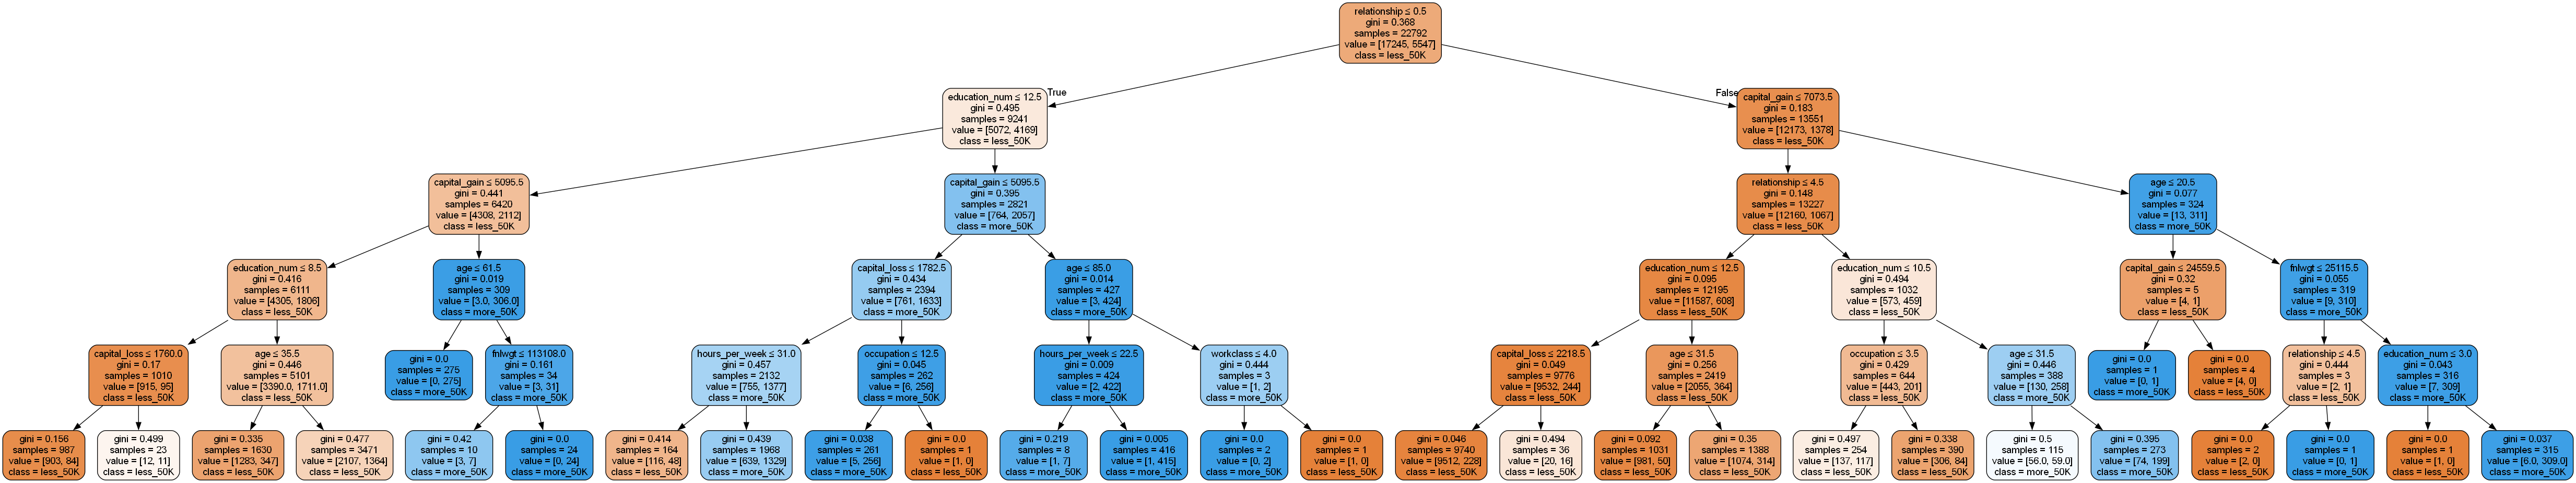

The uploaded image is a decision tree visualization from a classification task. Here's a general explanation based on your results:



1.   Root Node:
  *   The decision tree starts at the root, which represents the first split based on the feature with the highest information gain (or lowest Gini impurity). This feature is relationship
2.   Leaf Nodes:
  *   The terminal nodes (leaves) represent the predicted class labels (<=50K or >50K). Each leaf also shows the proportion of samples belonging to each class in that node.
3.   Colors::
  *   Blue Nodes: Predominantly represent one class (e.g., <=50K).
  *   Orange Nodes: Predominantly represent the other class (e.g., >50K).
4. Depth:
  *   The depth of the tree corresponds to the number of splits needed to classify a sample. The deeper the tree, the more complex the model.

## Grid Search Cross-Validation

After finding the results from the default model lets try some other configurations with different hyperparameters combinations. To do that we are going to use grid search cross-validation...


Let me explain the reasoning behind each of these parameter choices for the Adult Census Income dataset:

1. criterion: ["entropy", "gini"]:
  *   Gini tends to be faster to compute
  *   Entropy might sometimes provide better splits for binary classification (income prediction is binary)
2. max_depth: range(5, 15, 5) [5, 10]:
  *   This parameter prevents overfitting by limiting tree depth
  *   The Adult Census dataset has both numerical and categorical features, so a moderate depth range is chosen
3. min_samples_split: range(50, 150, 50) [50, 100]:
  *   Similar reasoning to min_samples_leaf
  *   These values ensure each split is statistically significant
  *   Good for this dataset because income prediction has natural variability
4. min_samples_leaf: range(50, 150, 50) [50, 100]:
  *   The Adult Census dataset is relatively large (~48,000 instances)
  *   Too few samples (<50) might create unreliable rules. Too many (>150) might prevent the model from learning important patterns
5. 'max_features': ['sqrt', 'log2']:
  *   For Adult Census Income dataset, this COULD be useful because it has multiple features (age, education, occupation, etc.)
  *   Feature selection at each split might improve generalization


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 15, 5),
    'min_samples_split': range(50, 150, 50),
    'min_samples_leaf': range(50, 150, 50),
    'max_features': ['sqrt', 'log2']
}

n_folds = 5

# Initialize the model & Perform grid search
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=n_folds, scoring={
        'accuracy': 'accuracy',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall'
    },
    refit='accuracy'
)

grid_search.fit(X_train, y_train)

#Create results Table
def create_results_tables():

  # Get all results
    results = pd.DataFrame(grid_search.cv_results_)

    # Configuration table
    config_table = pd.DataFrame(columns=['Model ID', 'Max Depth', 'Min Samples Leaf',
                                       'Min Samples Split', 'Criterion', 'Max Features'])

    metrics_table = pd.DataFrame(columns=['Model ID', 'CA', 'F1', 'PRC', 'RC', 'Predictions CA'])

    for idx, params in enumerate(results['params']):
        # Configuration row
        config_table.loc[idx] = [
            idx + 1,
            params['max_depth'],
            params['min_samples_leaf'],
            params['min_samples_split'],
            params['criterion'],
            params['max_features']
        ]

        # Metrics row
        metrics_table.loc[idx] = [
            idx + 1,
            results[f'mean_test_accuracy'][idx],
            results[f'mean_test_f1'][idx],
            results[f'mean_test_precision'][idx],
            results[f'mean_test_recall'][idx],
            # Get predictions CA on test set
            accuracy_score(y_test, grid_search.predict(X_test))
        ]

    return config_table, metrics_table

# Create and display tables
config_table, metrics_table = create_results_tables()

# Display tables
print("Table 1: Decision Tree Configurations")
print(config_table.to_string(index=False))
print("\nTable 2: Decision Tree Results")
print(metrics_table.to_string(index=False))

# Get best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Table 1: Decision Tree Configurations
 Model ID  Max Depth  Min Samples Leaf  Min Samples Split Criterion Max Features
        1          5                50                 50      gini         sqrt
        2          5                50                100      gini         sqrt
        3          5               100                 50      gini         sqrt
        4          5               100                100      gini         sqrt
        5          5                50                 50      gini         log2
        6          5                50                100      gini         log2
        7          5               100                 50      gini         log2
        8          5               100                100      gini         log2
        9         10                50                 50      gini         sqrt
       10         10                50                100      gini         sqrt
       11         10               100                 50      gini    

The best model was found with the following hyperparameters:
  *   Criterion: entropy
  *   Max Depth: 10
  *   Max Features: sqrt
  *   Min Samples Leaf: 50
  *   Min Samples Split: 100

This model achieved a best cross-validation score of approximately 84.89%, indicating strong performance during training and cross-validation.

## Decision Tree Classifier with Best Custom Hyperparameters

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with custom hyperparameters
clf_tree = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=10,
                                  max_features = "sqrt",
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_tree.fit(X_train, y_train)
clf_tree.score(X_test,y_test)

0.848017470825087

## Confusion Matrix For The Optimal Tree

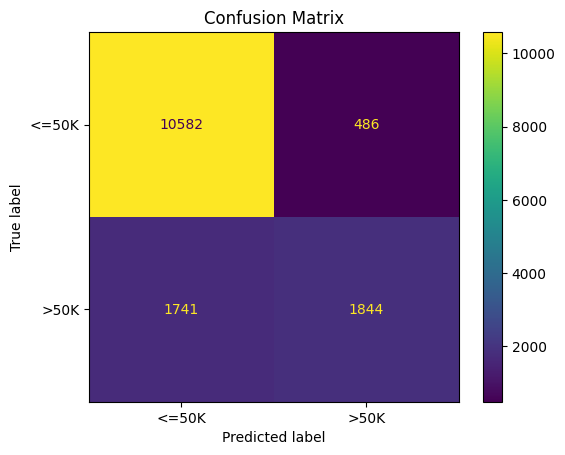

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on test data
y_pred = clf_tree.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model performs well for the majority class (<=50K), with a high number of correct predictions (10,582 true positives) and relatively few misclassifications (486 false negatives). However, for the minority class (>50K), the model struggles more, with 1,844 true positives and a higher number of false negatives (1,741). This highlights the impact of dataset imbalance, as the model is biased towards the majority class, leading to reduced sensitivity for the minority class.

## Decision Tree Structure Visualization

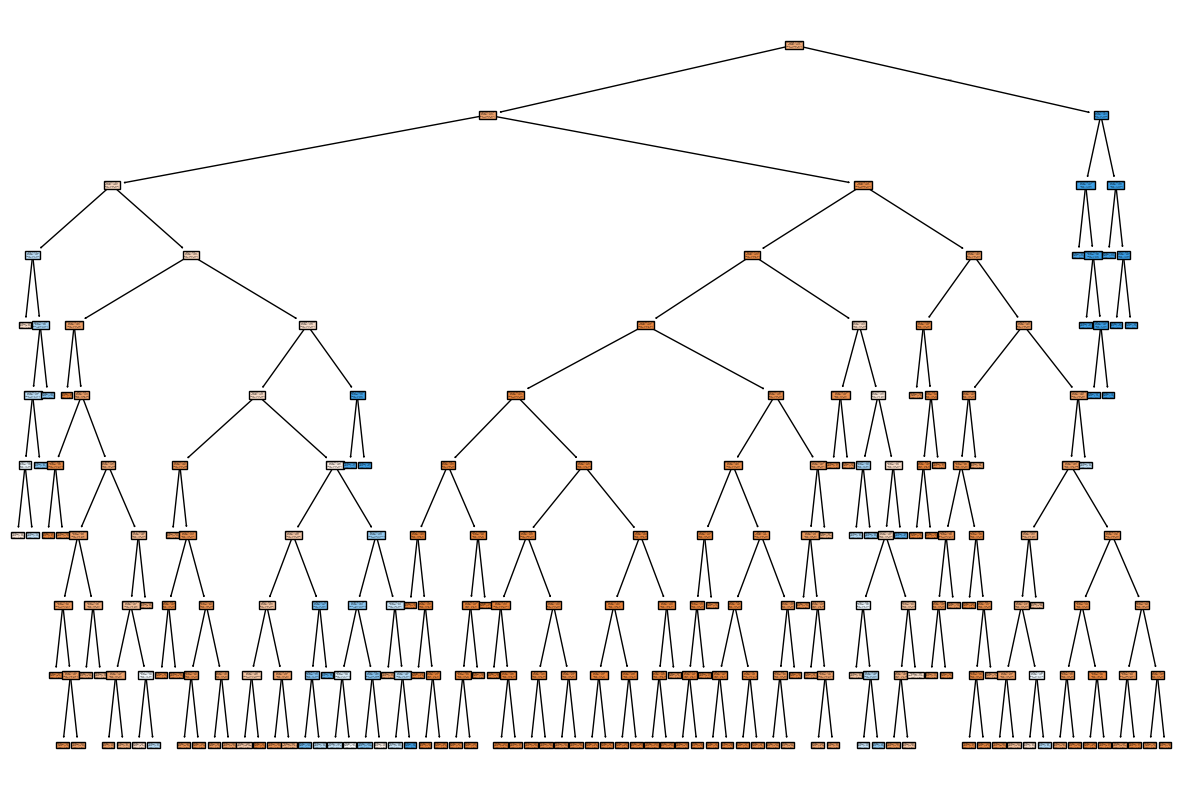

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf_tree, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()

Here is the visualization of the decision tree model, which reflects the optimal parameters from our previous experiments. The only modification made for visualization purposes is the reduction of the max_depth to 3, allowing for a clearer representation of the model’s structure.

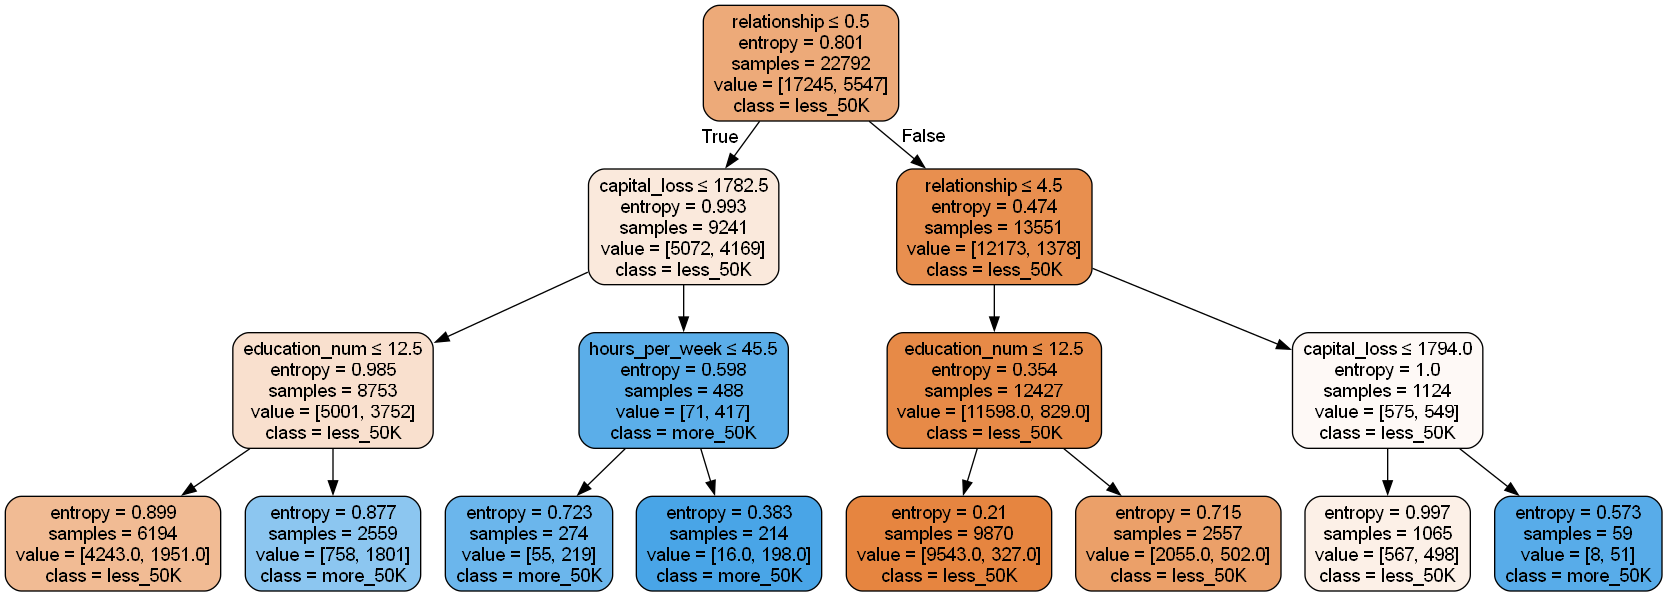

## Feature Importance

Visualizing which features the decision tree considers most important can be helpful.

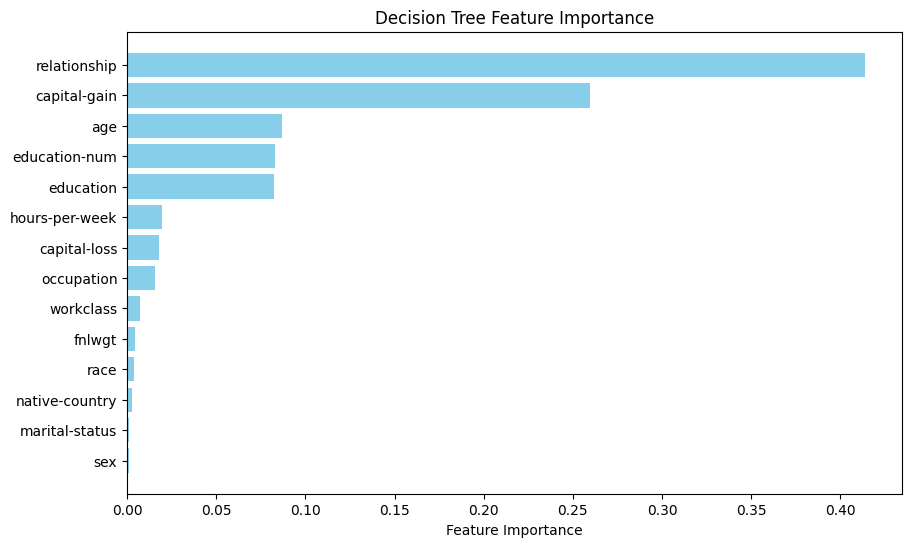

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = clf_tree.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

The graph displays the feature importance values derived from a decision tree classifier trained on the Adult Census Income dataset. The features are ranked by their contribution to the decision-making process of the model, with the relationship and capital-gain features being the most significant. The most influential features are relationship and capital-gain, while features like sex, marital-status, native-country, and race have very low importance.

Let's see how will the model perform if we use only the most important features and drop those with nearly to zero importance.

In [34]:
# Select important features based on the graph
important_features = ['relationship', 'capital-gain', 'age', 'education-num', 'education']

# Reduce the dataset to only include important features
X_reduced = X[important_features]

X_reduced


,relationship,capital-gain,age,education-num,education
0,1,2174,39,13,9
1,0,0,50,13,9
2,1,0,38,9,11
3,0,0,53,7,1
4,5,0,28,13,9
...,...,...,...,...,...
48837,1,0,39,13,9
48838,2,0,64,9,11
48839,0,0,38,13,9
48840,3,5455,44,13,9


In [35]:
from sklearn.feature_selection import SelectFromModel

# Automatically select features with importance > threshold
selector = SelectFromModel(clf_tree, prefit=True, threshold=0.01)  # Adjust threshold if needed
X_reduced = selector.transform(X)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Retrain the model with reduced features
clf_tree_reduced = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                                          min_samples_leaf=50, min_samples_split=100, random_state=42)
clf_tree_reduced.fit(X_reduced, y)

# Evaluate with cross-validation
cv_score = cross_val_score(clf_tree_reduced, X_reduced, y, cv=5)
print(f"Cross-Validation Score after Feature Reduction: {cv_score.mean() * 100:.2f}%")


Cross-Validation Score after Feature Reduction: 84.13%


After reducing low-importance features, the cross-validation score remained nearly the same (84.13%) compared to the original score (84.82%). This shows that dropping low-importance features like sex, native-country, and marital-status simplifies the model without sacrificing performance, making it more efficient and interpretable.

## Test Results with a 0.2 Test Size

When evaluating the decision tree model with default parameters and a test size of 0.2, the accuracy remained nearly unchanged, achieving a value of 85.11%. This consistency highlights the model's ability to perform well without needing much adjustment. To further analyze the model, I applied the same GridSearchCV settings that I used for the 0.3 test split, but this time for the 0.2 test size.

Interestingly, the accuracy dropped slightly by just 0.02, which is a very small difference. This shows that the model's performance is stable and not heavily impacted by the test split size or the tuning process. The results confirm that the decision tree is well-suited for this dataset and maintains reliable accuracy across different configurations.

# Conclusion

## Results Summary

*   Default Model:
  *   Configuration: max_depth=’none’, min_samples_leaf = 1; min_samples=2, criterion=’gini’, max_features = ‘none’
  *   Accuracy: 84.87%
*   Best Model from GridSearchCV:
  *   Configuration: max_depth=10, min_samples_leaf = 50; min_samples=100, criterion=’gini’, max_features = ‘log2’
  *   Accuracy: 84.49%
*   Dimensionality Reduction with Best Hyperparameters:
  *   Cross-Validation Score after Feature Reduction: 84.13%
*   0.2 Test Split:
  *   Deafault Model with 0.2 Test Split: Accuracy: 85.11%
  *   Best Model from GridSearchCV with 0.2 Test Split:: Accuracy: 81.11%

The results indicate that the decision tree model performs robustly across different configurations and test splits, with accuracy consistently hovering around 81%–85%. The best model hyperparameters from GridSearchCV offered only marginal improvements over the default settings. Dimensionality reduction further simplified the model without a significant drop in performance. This suggests that the dataset and the decision tree algorithm are well-suited to each other, and feature optimization or hyperparameter tuning yields only minor gains. This also indicates that the model is reliable for analyzing this data, with minimal gains and minimal losses.

